# Métodos de clustering espectral


En esta práctica vamos a ver cómo funciona el clustering espectral.

Para ello, como siempre, lo primero es cargar las librerías necesarias:

In [1]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

#from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

En nuestro primer ejemplo vamos a usar un dataset muy sencillo que nos permita entender lo que hacemos:

Text(0, 0.5, 'Largo')

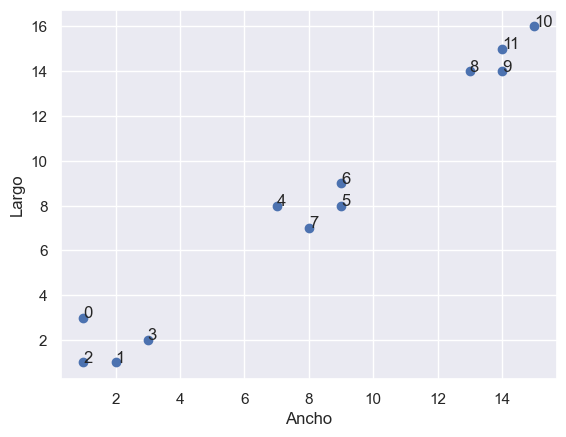

In [2]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
for i, txt in enumerate(range(X.shape[0])):
    ax.annotate(txt, X[i])
plt.xlabel('Ancho')
plt.ylabel('Largo')

Tal y como acabamos de ver, el agrupamiento espectral consiste en 4 pasos básicos:

-   la obtención de la matriz de adyacencias o afinidad,
-   la obtención de la matriz Laplaciana,
-   el cálculo de los vectores y valores propios de esta última,
-   y el clustering mediante K-means (u otra técnica tradicional).

Vamos a por la primera, la creación de la matriz de adyacencias o afinidad:

In [3]:
W_dist = pairwise_distances(X, metric='euclidean')
print(W_dist)

[[0.000 2.236 2.000 2.236 7.810 9.434 10.000 8.062 16.279 17.029 19.105
  17.692]
 [2.236 0.000 1.000 1.414 8.602 9.899 10.630 8.485 17.029 17.692 19.849
  18.439]
 [2.000 1.000 0.000 2.236 9.220 10.630 11.314 9.220 17.692 18.385 20.518
  19.105]
 [2.236 1.414 2.236 0.000 7.211 8.485 9.220 7.071 15.620 16.279 18.439
  17.029]
 [7.810 8.602 9.220 7.211 0.000 2.000 2.236 1.414 8.485 9.220 11.314
  9.899]
 [9.434 9.899 10.630 8.485 2.000 0.000 1.000 1.414 7.211 7.810 10.000
  8.602]
 [10.000 10.630 11.314 9.220 2.236 1.000 0.000 2.236 6.403 7.071 9.220
  7.810]
 [8.062 8.485 9.220 7.071 1.414 1.414 2.236 0.000 8.602 9.220 11.402
  10.000]
 [16.279 17.029 17.692 15.620 8.485 7.211 6.403 8.602 0.000 1.000 2.828
  1.414]
 [17.029 17.692 18.385 16.279 9.220 7.810 7.071 9.220 1.000 0.000 2.236
  1.000]
 [19.105 19.849 20.518 18.439 11.314 10.000 9.220 11.402 2.828 2.236
  0.000 1.414]
 [17.692 18.439 19.105 17.029 9.899 8.602 7.810 10.000 1.414 1.000 1.414
  0.000]]


In [4]:
W_dist.shape

(12, 12)

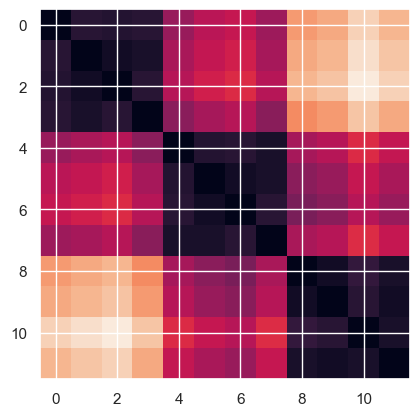

In [5]:
plt.imshow(W_dist)

In [6]:
# construímos la matriz de adyacencias o afinidad
W_ad = np.zeros_like(W_dist, np.uint8)
W_ad[W_dist < 5 ] = 1
print(W_ad)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


Vamos a utilizar el paquete networkx para visualizar el grafo

In [7]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

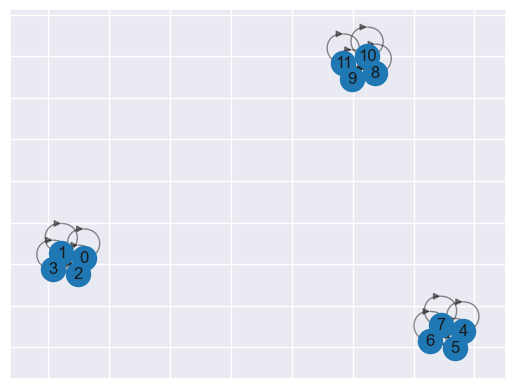

In [8]:
# G = nx.from_numpy_matrix(W_ad)
G = nx.DiGraph(W_ad)
draw_graph(G)

`networkx` también nos permite calcular la matriz de afinidad a partir del grafo. Vamos a ver como:

In [9]:
W_ad = nx.adjacency_matrix(G)
print(W_ad)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	1
  (4, 4)	1
  (4, 5)	1
  (4, 6)	1
  (4, 7)	1
  (5, 4)	1
  (5, 5)	1
  (5, 6)	1
  (5, 7)	1
  (6, 4)	1
  (6, 5)	1
  (6, 6)	1
  (6, 7)	1
  (7, 4)	1
  (7, 5)	1
  (7, 6)	1
  (7, 7)	1
  (8, 8)	1
  (8, 9)	1
  (8, 10)	1
  (8, 11)	1
  (9, 8)	1
  (9, 9)	1
  (9, 10)	1
  (9, 11)	1
  (10, 8)	1
  (10, 9)	1
  (10, 10)	1
  (10, 11)	1
  (11, 8)	1
  (11, 9)	1
  (11, 10)	1
  (11, 11)	1


Fijense que esto que nos devuelve no parece una matriz, verdad? Has oído hablar del término *sparse*? Pues esto que acabamos de ver es una matriz *sparse*, que simplemente es una matriz con muy pocos elementos diferentes de 0.

Para verla en formato matriz necesitamos hacer uso del método `todense()`

In [10]:
print(W_ad.todense())

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


Ahora tenemos que obtener la matriz Laplaciana, recordar que se obtenía como la resta entre la matriz de adyacencia y la matriz de grado.

In [11]:
# matriz de grado
D = np.diag(np.sum(np.array(W_ad.todense()), axis=1))
print('Matriz de grado:\n', D)

Matriz de grado:
 [[4 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 4]]


In [12]:
# matriz laplaciana
L = D - W_ad
print('Matriz Laplaciana:\n', L)

Matriz Laplaciana:
 [[ 3 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1 -1 -1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1  3 -1 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  3 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1 -1  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1 -1  3]]


La matriz Laplaciana es una matriz especial con ciertas propiedades que nos facilitan la vida. Una de ellas es que:

-   **si el grafo `W` tiene `K` componentes conexas, entonces `L` tiene `K` vectores propios (*eigenvectors*) con valor propio (*eigenvalue*) igual a 0.**

En este caso, cuantos eigenvectors vamos a tener iguales a 0?

In [13]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[4.000 -0.000 4.000 4.000 4.000 -0.000 4.000 4.000 4.000 -0.000 4.000
 4.000]
eigenvectors:
[[0.866 -0.500 -0.142 0.200 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 0.745 -0.557 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 -0.650 -0.363 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [-0.289 -0.500 0.047 0.720 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 0.866 -0.500 -0.142 0.200 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 -0.289 -0.500 0.745 -0.557 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 -0.289 -0.500 -0.650 -0.363 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 -0.289 -0.500 0.047 0.720 0.000 0.000 0.000
  0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.866 -0.500 -0.213
  0.086]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.820
  0.234]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.082
  -0.826]
 [0.000 0.000 0.00

En efecto, 3! No nos debería sorprender, ya que nuestro conjunto de datos tiene 3 clusters conexos.

Tenemos 3 componentes conexos en nuestro dataset.


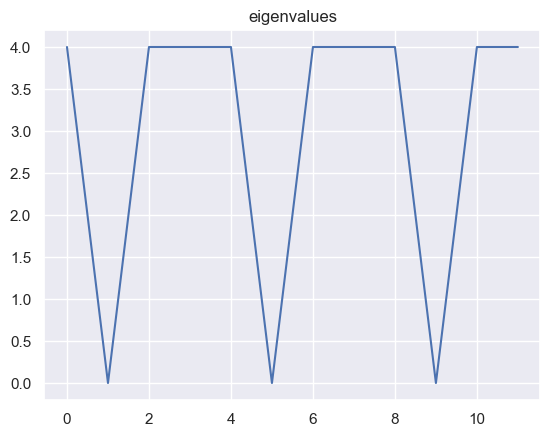

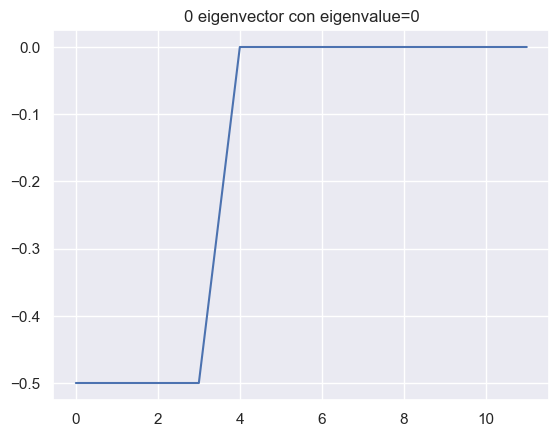

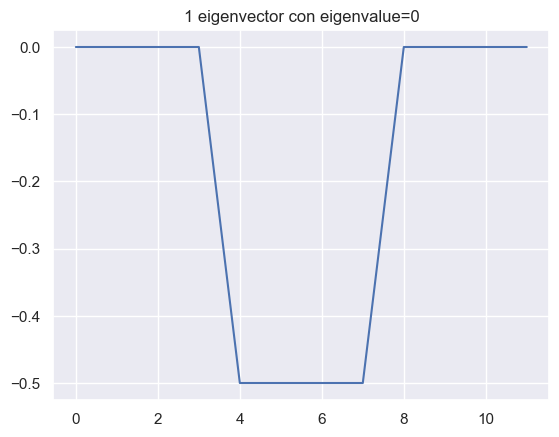

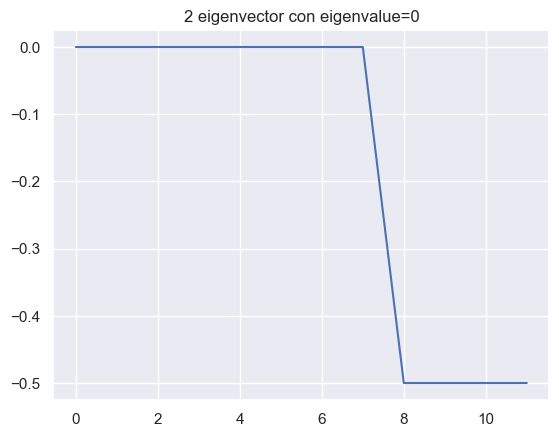

In [14]:
plt.figure()
plt.plot(e)
plt.title('eigenvalues')

eigen_0 = np.where(e < 10e-6)[0]
print(f'Tenemos {len(eigen_0)} componentes conexos en nuestro dataset.')
for n, i in enumerate(eigen_0):
    plt.figure()
    plt.plot(v[:, i])
    plt.title(f'{n} eigenvector con eigenvalue=0')

Text(0, 0.5, 'Largo')

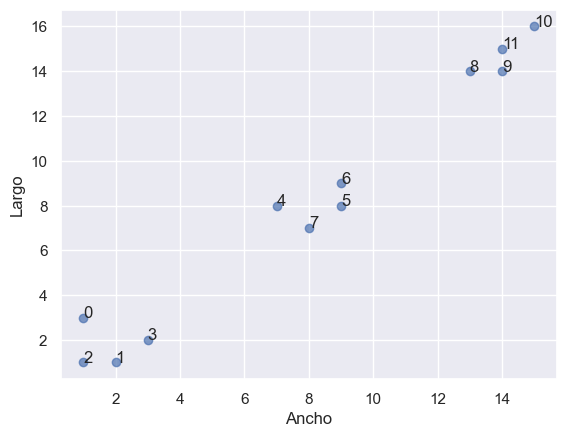

In [15]:
# veamos nuestro dataset de nuevo
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
for i, txt in enumerate(range(X.shape[0])):
    ax.annotate(txt, X[i])
plt.xlabel('Ancho')
plt.ylabel('Largo')

Si nos fijamos en las gráficas de los 3 primeros vectores propios de la matriz L (cuyos valores propios son 0), podemos ver cómo nos permiten separar correctamente los 3 clusters de nuestro dataset trazando una línea horizontal.

Recordar que esto es buena señal, nos indica que con esta nueva representación de los datos, un algoritmo de clustering podrá separarlos correctamente.

Vamos a comprobar si es cierto:

In [17]:
vectores_propios_a_utilizar = eigen_0 # en este caso queremos usar los 3, podría ser diferente
v[:, vectores_propios_a_utilizar]

array([[-0.500, 0.000, 0.000],
       [-0.500, 0.000, 0.000],
       [-0.500, 0.000, 0.000],
       [-0.500, 0.000, 0.000],
       [0.000, -0.500, 0.000],
       [0.000, -0.500, 0.000],
       [0.000, -0.500, 0.000],
       [0.000, -0.500, 0.000],
       [0.000, 0.000, -0.500],
       [0.000, 0.000, -0.500],
       [0.000, 0.000, -0.500],
       [0.000, 0.000, -0.500]])

In [20]:
Xnew = np.array(v[:, vectores_propios_a_utilizar])
km = KMeans(init='k-means++', n_clusters=len(eigen_0))
km.fit(Xnew)
km.labels_

C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

Text(0, 0.5, 'Largo')

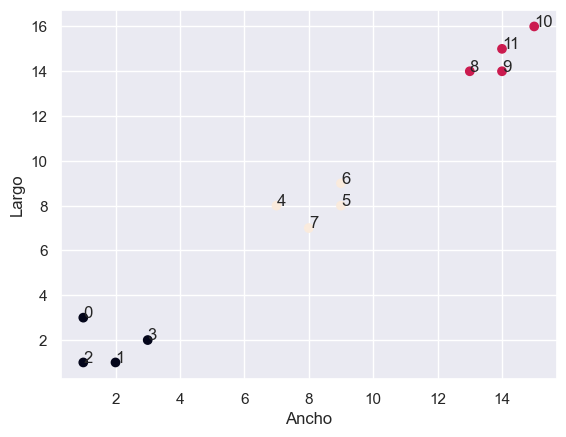

In [21]:
# veamos el resultado del clustering
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=km.labels_)
for i, txt in enumerate(range(X.shape[0])):
    ax.annotate(txt, X[i])
plt.xlabel('Ancho')
plt.ylabel('Largo')

¿Y si visualizamos los datos proyectados usando los 3 vectores propios?

Text(0, 0.5, 'Largo')

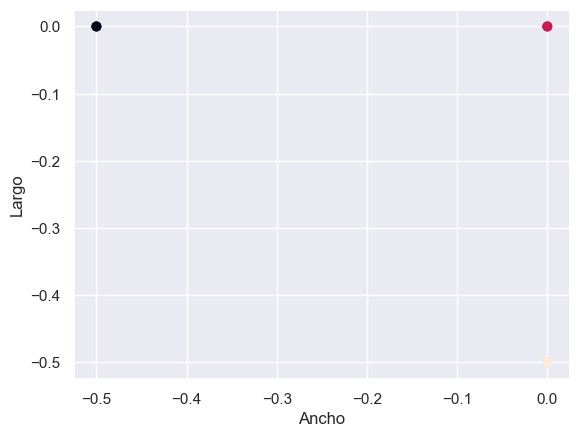

In [22]:
# veamos el dataset proyectado usando los 3 vectores propios escogidos
fig, ax = plt.subplots()
ax.scatter(Xnew[:, 0], Xnew[:, 1], c=km.labels_)
plt.xlabel('Ancho')
plt.ylabel('Largo')

Fijense lo fácil que debe ser ahora para el k-means con esta nueva representación de los datos. 

Como has podido comprobar, al final, lo único que estamos haciendo es cambiar el espacio de representación de los datos por uno que nos permita agruparlos mejor. ¿Les suena esto de algo?

En efecto, es básicamente el modo de funcionamiento de las redes neuronales profundas, en las que los datos van sufriendo transformaciones en cada capa hasta llegar a una representación que facilita la tarea a desarrollar.

"Pero Manuel, este ejemplo es muy sencillo", puedes estar pensando. Y nos falta razón. Vamos a complicarlo un poco:

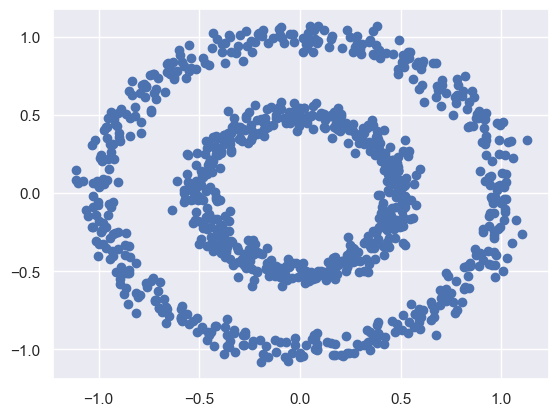

In [23]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

Vamos a probar con el k-means, a ver qué tal...

C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


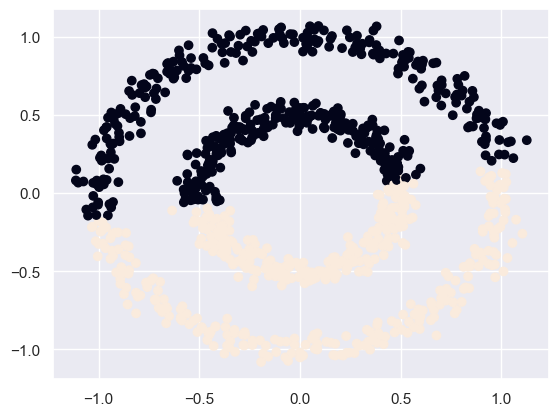

In [24]:
km = KMeans(n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_)

Parece que nos he engañado, el k-means no es capaz de hacer el agrupamiento de forma correcta.

Vamos a ver si con lo que acabamos de aprender somos capaces. Para ello, recordar que necesitamos:

-   la obtención de la matriz Laplaciana,
-   la obtención de la matriz de adyacencias o afinidad,
-   el cálculo de los vectores y valores propios de esta última,
-   y el clustering mediante K-means (u otra técnica tradicional).

Manos a la obra:

Matriz distancias:
 [[0.000 0.705 1.474 ... 0.673 0.356 0.955]
 [0.705 0.000 0.786 ... 0.818 0.869 0.820]
 [1.474 0.786 0.000 ... 1.323 1.553 1.094]
 ...
 [0.673 0.818 1.323 ... 0.000 0.417 0.359]
 [0.356 0.869 1.553 ... 0.417 0.000 0.764]
 [0.955 0.820 1.094 ... 0.359 0.764 0.000]]


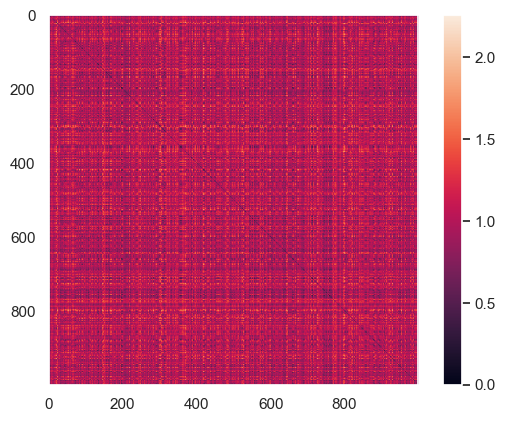

In [25]:
W_dist = pairwise_distances(X, metric='euclidean')
print('Matriz distancias:\n', W_dist)
plt.imshow(W_dist)
plt.colorbar()
plt.grid(False)

In [26]:
# Vamos a escoger 0.5 como el umbral
W_ad = np.zeros_like(W_dist, np.uint8)
W_ad[W_dist < .5] = 1
print('Matriz de adyacencia:\n', W_ad)

Matriz de adyacencia:
 [[1 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 1]]


In [27]:
# matriz de grado
D = np.diag(np.sum(W_ad, axis=1))
print('Matriz de grado:\n', D)

Matriz de grado:
 [[191   0   0 ...   0   0   0]
 [  0 184   0 ...   0   0   0]
 [  0   0  86 ...   0   0   0]
 ...
 [  0   0   0 ... 182   0   0]
 [  0   0   0 ...   0 189   0]
 [  0   0   0 ...   0   0 183]]


In [28]:
# matriz laplaciana
L = D - W_ad
print('Matriz Laplaciana:\n', L)

Matriz Laplaciana:
 [[       190          0          0 ...          0 4294967295          0]
 [         0        183          0 ...          0          0          0]
 [         0          0         85 ...          0          0          0]
 ...
 [         0          0          0 ...        181 4294967295 4294967295]
 [4294967295          0          0 ... 4294967295        188          0]
 [         0          0          0 ... 4294967295          0        182]]


In [29]:
# calculamos los eigenvectors y eigenvalues
e, v = np.linalg.eig(L)

Tenemos 0 componentes conexos en nuestro dataset.


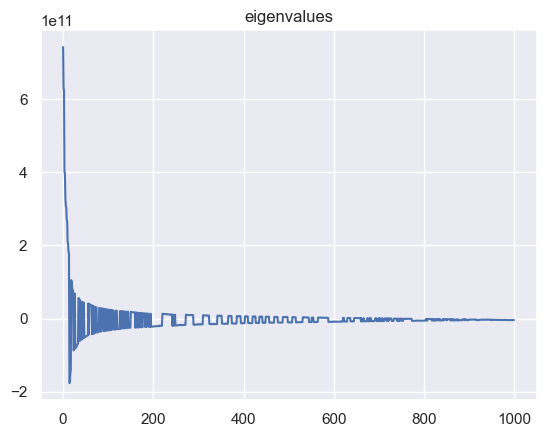

In [30]:
plt.figure()
plt.plot(e)
plt.title('eigenvalues')

eigen_0 = np.isclose(e, 0, atol=1e-3)
print(f'Tenemos {sum(eigen_0)} componentes conexos en nuestro dataset.')

Fijate que mirando los eigenvalues no parece que sea fácil elegir con qué componentes queremos quedarnos para hacer el clustering, ¿verdad?

¿Se les ocurre alguna forma mejor de seguir?

¿Probamos a calcular la matriz laplaciana normalizada simétrica a ver si mejora?

Tenemos 3 componentes conexos en nuestro dataset.


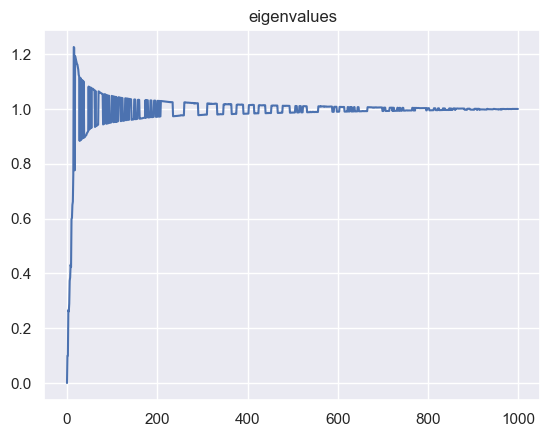

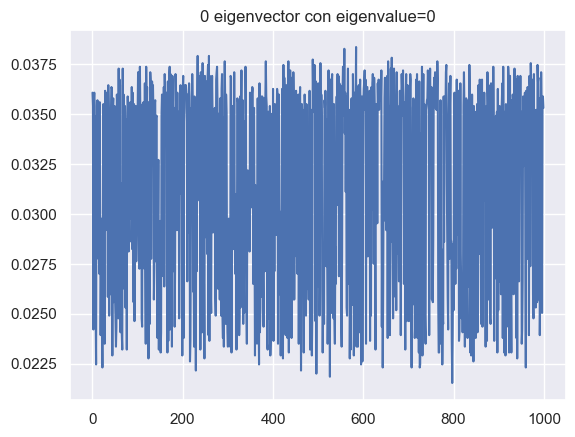

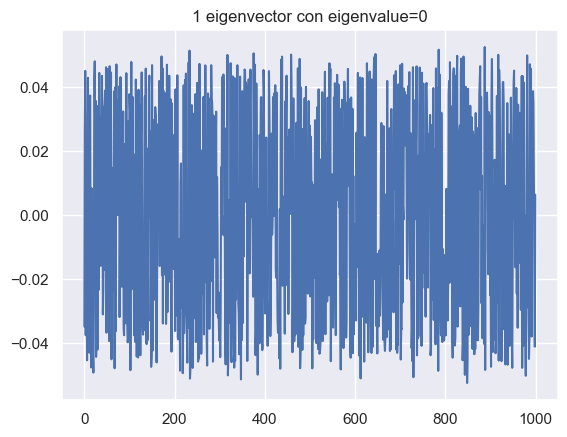

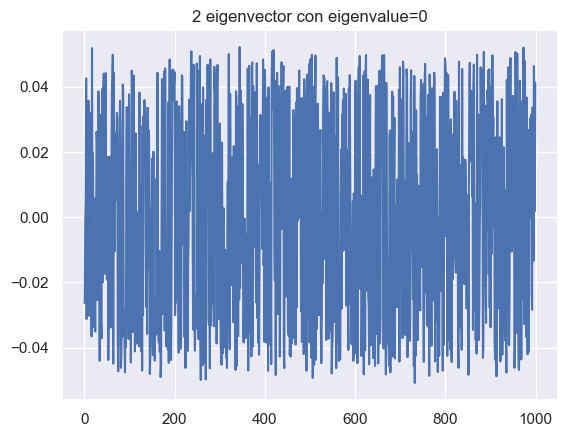

In [31]:
# calculamos la laplaciana normalizada simétrica
D = np.sum(W_ad, axis=1)
D = D**(-1./2)
I = np.diag(np.ones(D.size))
D = np.diag(D)
L = I - D.dot(W_ad).dot(D)

# calculamos autovectores y autovalores
e, v = np.linalg.eig(L)

plt.figure()
plt.plot(e)
plt.title('eigenvalues')

eigen_0 = np.where(np.isclose(e, 0, atol=1e-1))[0]
print(f'Tenemos {len(eigen_0)} componentes conexos en nuestro dataset.')
for n, i in enumerate(eigen_0):
    plt.figure()
    plt.plot(v[:, i])
    plt.title(f'{n} eigenvector con eigenvalue=0')

En este caso parece que encuentra las 3 componentes conexas! Vamos a ver si funciona el clustering:

In [32]:
vectores_propios_a_utilizar = eigen_0
print(vectores_propios_a_utilizar)
Xnew = np.array(v[:, vectores_propios_a_utilizar])
km = KMeans(init='k-means++', n_clusters=2)
km.fit(Xnew)

[0 1 2]


C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2)

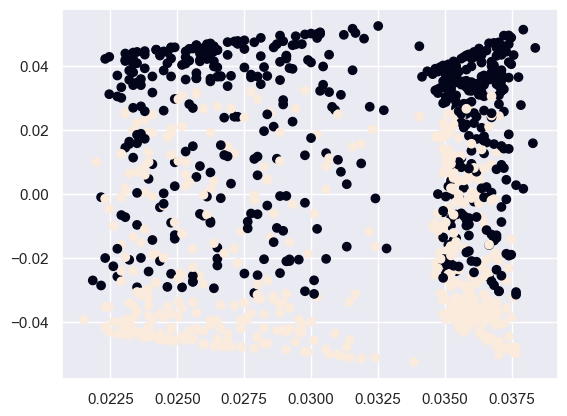

In [33]:
# veamos el resultado del clustering
fig, ax = plt.subplots()
ax.scatter(Xnew[:,0], Xnew[:,1], c=km.labels_)

Parece que no. Vamos a ver los datos en su nuevo espacio de representación:

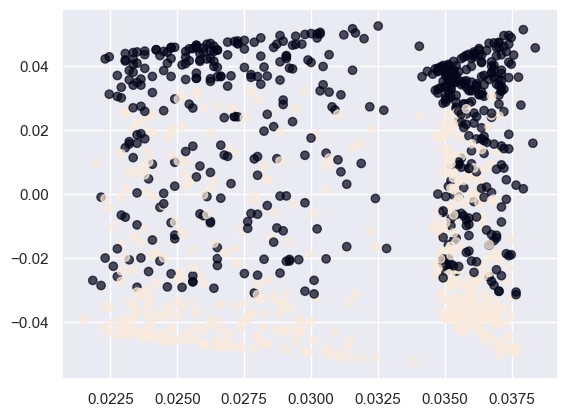

In [34]:
# veamos el dataset proyectado usando los 3 vectores propios escogidos
fig, ax = plt.subplots()
ax.scatter(Xnew[:,0], Xnew[:,1], c=km.labels_, alpha=0.7)

Fijate que mirando la nueva representación de los datos, no parece que el k-means vaya a poder hacer bien el clustering, ¿verdad?

¿Se les ocurre alguna forma mejor de seguir?

¿Quizá pensando en cómo hemos construído la matriz de adyacencia? ¿Existe alguna otra forma de hacerlo?

Eso es, podemos intentarlo haciendo uso del kNN en vez del umbral ($\epsilon$).

Vamos allá:

In [35]:
def matriz_afinidad_KNN(mSimilitud, KNN=5):
    auxM = mSimilitud.copy()
    np.fill_diagonal(auxM, 0)

    # Construimos la matriz afinidad de A a B
    mAfinidadA = np.zeros(auxM.shape)
    # utilizamos la matriz similitud para ordenar los vecinos de cada nodo por cercanía
    # `np.argsort` nos devuelve los índices que ordenan el array introducido (de forma ascendente)
    # en este caso, al tener la matriz similitud, tenemos que hacerla negativa, para que nos 
    # devuelva primero los más similares (que al ponerle el - a la matriz de similitud, son los
    # valores más pequeños)
    # Flatten simplemente lo utilizamos para convertir la matriz `KNN x n`en un vector de 1x(KNN x n)
    indices_kNN_nodo_fila = np.argsort(-auxM, axis=0)[0:KNN, :].flatten()
    # Nos creamos un array para combinar con el anterior y poder indexar los 
    # elementos pertinentes de la matriz de afinidad
    indices_kNN_nodo_col = np.tile(np.arange(auxM.shape[0]), KNN)
    mAfinidadA[indices_kNN_nodo_fila, indices_kNN_nodo_col] = 1
    np.fill_diagonal(mAfinidadA, 1)

    # Y ahora hacemos lo mismo de B a A
    mAfinidadB = np.zeros(auxM.shape)
    # Fijaos que en este caso la matriz va a ser `n x KNN` (hacemos el argsort en la dirección columnas: -->)
    indices_kNN_nodo_fila = np.repeat(np.arange(auxM.shape[0]), KNN)
    indices_kNN_nodo_col = np.argsort(-auxM, axis=1)[:, 0:KNN].flatten()
    mAfinidadB[indices_kNN_nodo_fila, indices_kNN_nodo_col] = 1
    np.fill_diagonal(mAfinidadB, 1)

    return (mAfinidadA + mAfinidadB) / 2

In [36]:
# calculamos de nuevo la matriz de adyacencia (o afinidad), esta vez siguiendo el enfoque de los kNN
sigma = 0.1
W_sim = np.exp(-np.power(W_dist,2)/(2*sigma**2))
W_ad = matriz_afinidad_KNN(W_sim)
print(W_ad)

[[1.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 1.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 1.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 1.000]]


Tenemos 2 componentes conexos en nuestro dataset.


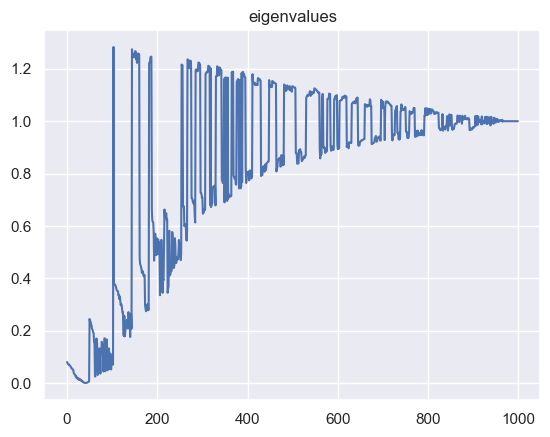

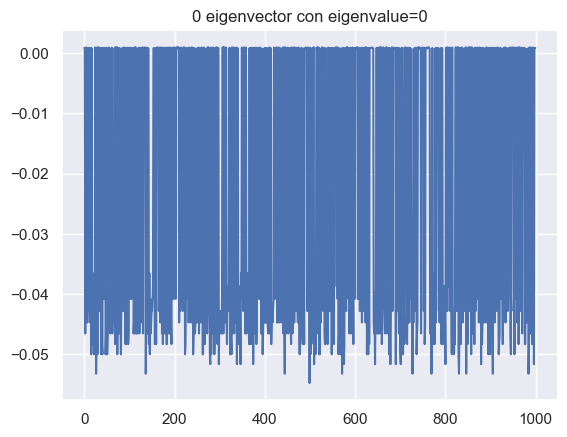

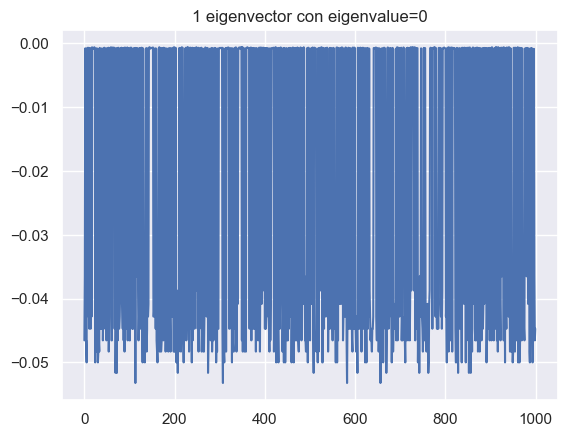

In [37]:
# calculamos la laplaciana normalizada simétrica
D = np.sum(W_ad,axis=1)
D = D**(-1./2)
I = np.diag(np.ones(D.size))
D = np.diag(D)
L = I - D.dot(W_ad).dot(D)

# calculamos autovectores y autovalores
e, v = np.linalg.eig(L)

plt.figure()
plt.plot(e)
plt.title('eigenvalues')

eigen_0 = np.where(np.isclose(e, 0, atol=1e-5))[0]
print(f'Tenemos {len(eigen_0)} componentes conexos en nuestro dataset.')
for n, i in enumerate(eigen_0):
    plt.figure()
    plt.plot(v[:, i])
    plt.title(f'{n} eigenvector con eigenvalue=0')

Parece que ahora encuentra 2 componentes conexos! Vamos a probar a hacer el clustering:

In [38]:
v[:, vectores_propios_a_utilizar]

array([[0.001, 0.005, -0.011],
       [-0.000, 0.000, -0.000],
       [-0.000, 0.000, 0.000],
       ...,
       [-0.083, 0.020, -0.001],
       [-0.058, -0.157, 0.086],
       [0.047, -0.024, -0.002]])

In [39]:
vectores_propios_a_utilizar = eigen_0
print(vectores_propios_a_utilizar)
Xnew = np.array(v[:, vectores_propios_a_utilizar])
km = KMeans(n_clusters=2)
km.fit(Xnew)

[40 41]


C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2)

Veamos el resultado:

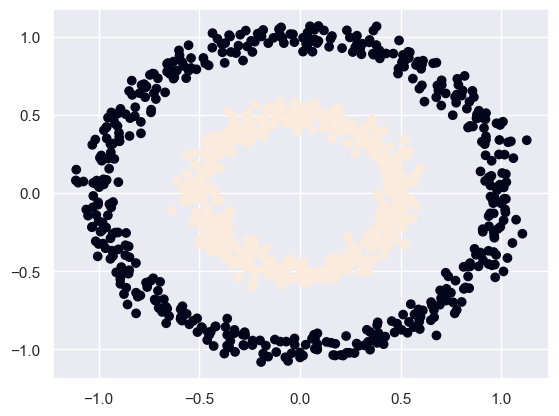

In [40]:
# veamos el resultado del clustering
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=km.labels_)

Fijate como es muy importante elegir el tipo de enfoque adecuado dependiendo de los datos. Cuando hemos construido la $W_{ad}$ mediante el método del umbral, nos hemos inventado completamente dicho umbral.

Esto no quiere decir que no exista un umbral para el cual no funcione correctamente el clustering siguiendo ese enfoque, lo que quiere decir es que si no conocemos el umbral, es posiblemente más sencillo seguir el enfoque de los kNN.

Vamos a ver los datos en su nuevo espacio:

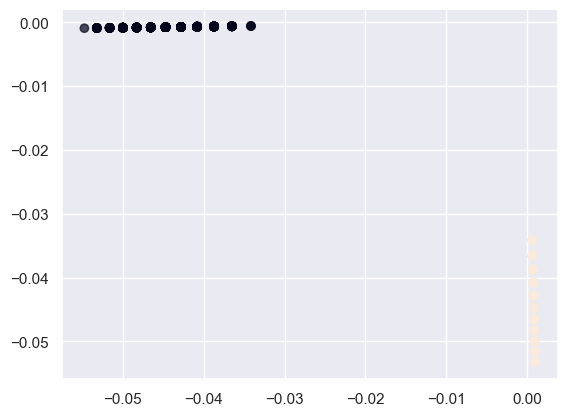

In [42]:
# veamos el dataset proyectado usando los 3 vectores propios escogidos
fig, ax = plt.subplots()
ax.scatter(Xnew[:,0], Xnew[:,1], c=km.labels_, alpha=0.7)

Maravilloso, ¿les parece?


Y más maravilloso les va a parecer aún lo siguiente:

C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


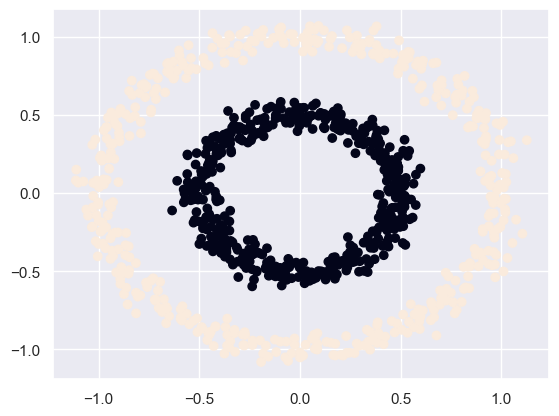

In [43]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_)

En efecto, así de rápido podemos realizar un clustering espectral utilizando las librerías existentes!

Fuente: https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045

Ejemplo paso a paso para entender y profundizar:
-  https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

Más ejemplos:

-  https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html
-  https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_segmentation.html

Lecturas discutiendo la similitud de k-means, clustering espectral y PCA, para quien tenga interés:

-  https://stats.stackexchange.com/a/151665
-  https://stats.stackexchange.com/a/189324
-  https://stats.stackexchange.com/a/189324 (muy completa y didáctica)
-  https://qr.ae/TW25h8
